::: {.grid}

::: {.g-col-4}
![](metronomes.jpg)
:::

::: {.g-col-8}
I was watching the other day a video from Matt Parker's youtube channel "**Stand-up Maths**" where he was using an excel spreadsheet to model the synchronization of 3 metronomes. The synchronization of metronomes is a nice practical experiment to present the phenomenon of spontaneous synchronization.
:::

:::

The idea is that every number of oscillators (like the metronomes) will come into synchronization when coupled together. While each metronome has a different natural frequency, the interaction between them due to the board underneath(*which moves freely*) makes them synchronized with each other (phase lock). You can find the video [here.](https://youtu.be/J4PO7NbdKXg)

The first person that noticed this phenomenon was a Dutch scientist and engineer called Christiaan Huygens in 1665. He invented the pendulum clock which was a breakthrough in timekeeping and the most accurate timekeeper for the next 300 years. Huygens noticed that when two pendulum clocks hung from the same wood beam, each pendula always moved opposite of one another so that when one was on the furthest left, the other would be on the furthest right and vice versa (anti-phase). No matter how he disturbed their rhythm, the clocks would always come back to the same relative orientation, what he later called "the sympathy of two clocks". After some experiments, he decided that each pendulum caused an imperceptible motion in the beam which they were hanging, and that motion tended to force the other pendulum toward moving in the same phase. Once the pendula were synchronized, their opposite forces would cancel and the beam would stay still.

While Huygens noticed the phenomenon of spontaneous synchronization in the 17th century, there is still ongoing research about it because it can be found in many different natural systems. It can be observed in circadian rhythms, heart & intestinal muscles, insulin-secreting cells in the pancreas, and fireflies’ light turning on and off at the same time, among others. There is a nice video about the phenomenon on the youtube channel "**Veritasium**" which you can find [here.](https://youtu.be/t-_VPRCtiUg)

The mathematical model that Matt Parker uses in his video was created by Yoshiki Kuramoto in 1975. The governing equation of the model is:
$$\dot{θ} = ω_{i} + \frac{K}{N}\sum_{j=1}^{N}sin(θ_{j}-θ_{i}), \;\;  i=1,...,N$$

where $ω_{i}$ is the oscillators' natural frequencies, K is the coupling constant and N is the total number of oscillators. Next, I will try to model synchronization in Python language. I created a class called `Metronome` that initializes metronome instances, each with an initial offset. The `calculate_synchronization` method applies the Kuramoto model on all instances created and calculates the new offset. The `calculate_phase` method calculates each metronome instance's phase given the offset, before and after the synchronization. Finally, to create new instances I clear the metronomes list with the method `clear_metronomes`.

Below are examples of 3, 4, and 6 metronomes with an equal distance from each other. Finally an example with 5 metronomes at a random distance. Note that I changed the coupling distance, depending on the number of metronomes and the phase distance between them to synchronize within the same time limit.

In [1]:
#| code-summary: Importing numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='ticks', palette='colorblind', font_scale=1.2)

In [2]:
#| code-fold: false

class Metronome:
    """
    The class creates metronome instances
    
    Attributes:
        X (numpy.ndarray): time
        k (float): coupling constant
        metronomes_list (list): a list containing all created instances
    """

    X = np.linspace(0, 100, 1000)
    k = 0.005
    metronomes_list = []


    def __init__(self, initial_offset):
        """Creates a metronome instance with an initial phase
        that is not sychronized with the other instances.
        """

        self.offset = np.array([initial_offset])
        self.y = self.calculate_phase(initial_offset)
        self.metronomes_list.append(self)

    def calculate_phase(self, offset):
        """Calculates phase based on instanse's offset"""
        return np.sin(self.X + offset)

    @classmethod
    def calculate_synchronization(cls):
        """Calculates synchronization for all instances created."""

        for i in range(1, len(cls.X)):
            for metronome in cls.metronomes_list:
                new_offset = metronome.offset[i-1] +\
                             ((cls.k/len(cls.metronomes_list)) * 
                               np.sum([np.sin(metronome_other.offset[i-1] - metronome.offset[i-1])
                                       for metronome_other in cls.metronomes_list
                                       if metronome != metronome_other]))
                metronome.offset = np.append(metronome.offset, new_offset)
        
        for metronome in cls.metronomes_list:
            metronome.y = metronome.calculate_phase(metronome.offset)

    @classmethod
    def clear_metronomes(cls):
        """Reinitialize the list of instances."""
        
        cls.metronomes_list = []

In [3]:
#| code-summary: A plotting function

def plot_metronomes(title):
    """Creates a lineplot for each metronome instance saved in Metronome list."""

    plt.figure(figsize=(22, 6))
    plt.axhline(0, color='grey', linestyle='--', alpha=0.5)

    for metronome in Metronome.metronomes_list:
        plt.plot(metronome.X, metronome.y)
        
    plt.title(title)
    plt.xlabel('Time')
    plt.show()

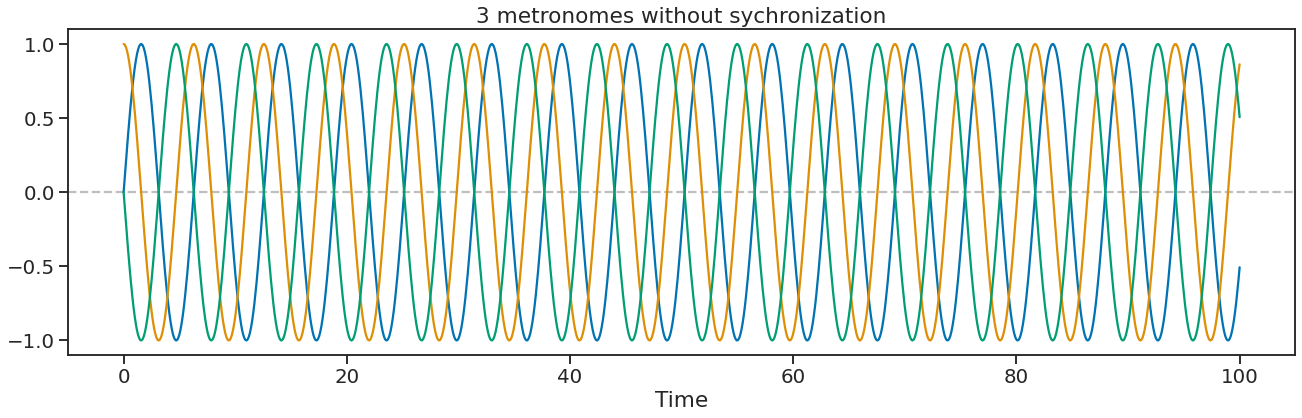

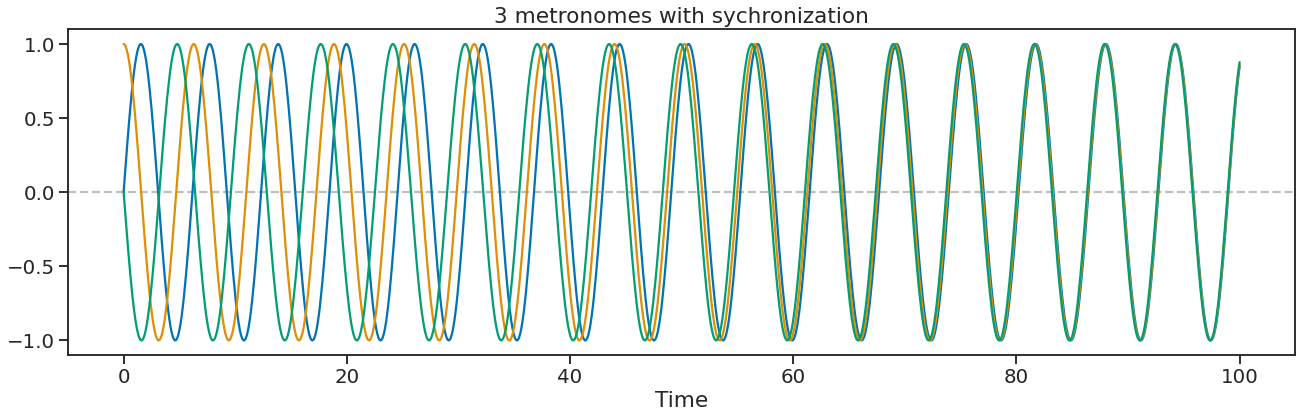

In [4]:
#| code-summary: 3 metronomes in equal distance

m1 = Metronome(0)
m2 = Metronome(np.pi/2)
m3 = Metronome(np.pi)

plot_metronomes('3 metronomes without sychronization')

Metronome.calculate_synchronization()

plot_metronomes('3 metronomes with sychronization')

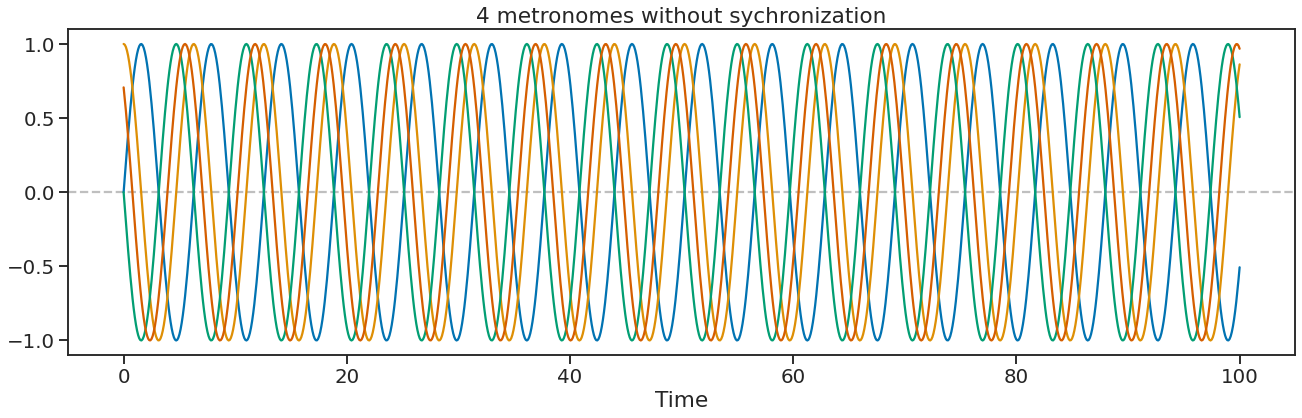

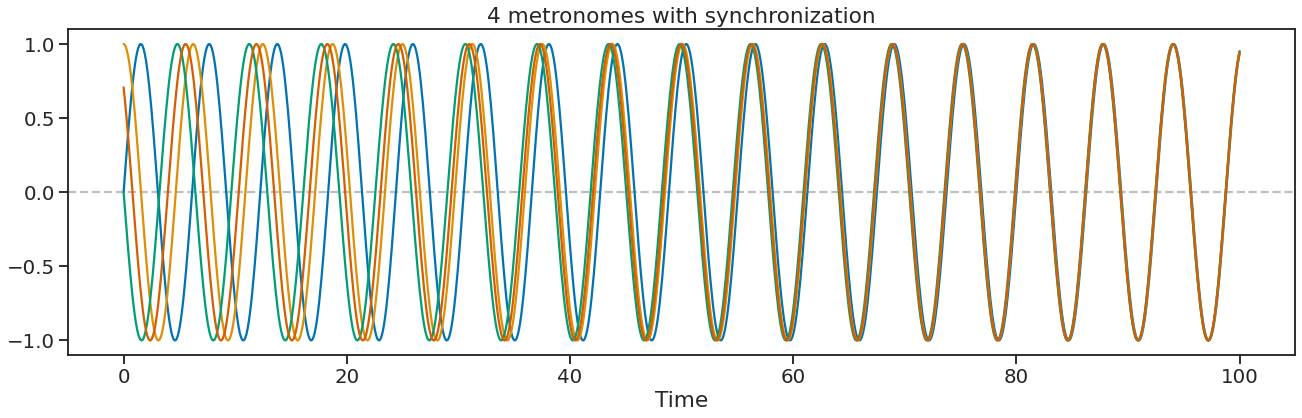

In [5]:
#| code-summary: 4 metronomes in equal distance

Metronome.clear_metronomes()

m1 = Metronome(0)
m2 = Metronome(np.pi/2)
m3 = Metronome(np.pi)
m4 = Metronome(3*np.pi/4)

plot_metronomes('4 metronomes without sychronization')

Metronome.calculate_synchronization()

plot_metronomes('4 metronomes with synchronization')

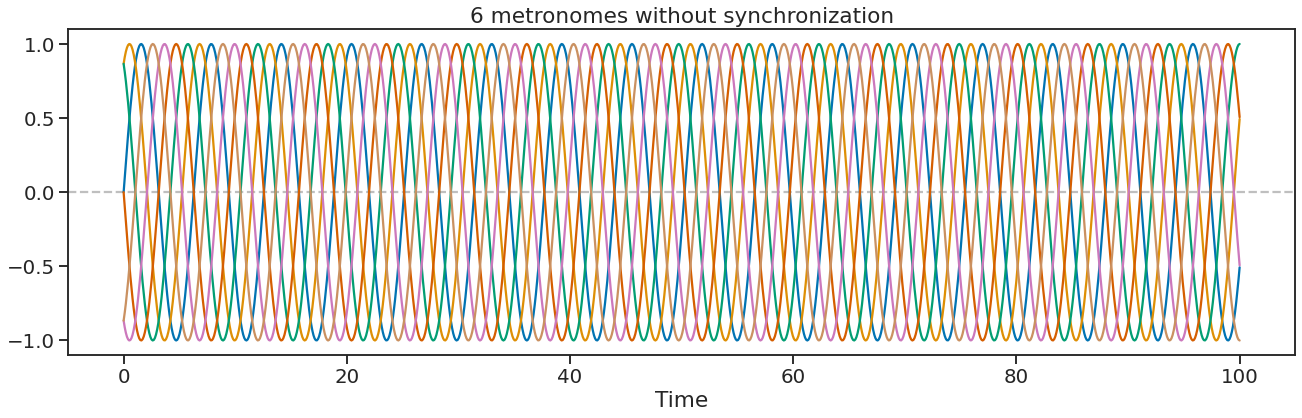

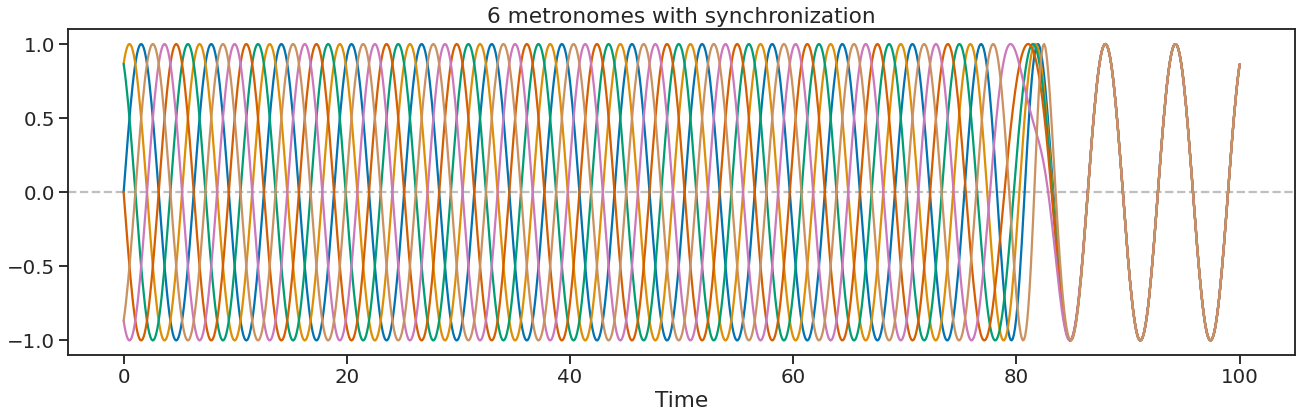

In [6]:
#| code-summary: 6 metronomes in equal distance

Metronome.clear_metronomes()
Metronome.k = 0.11

m1 = Metronome(0)
m2 = Metronome(np.pi/3)
m3 = Metronome(2*np.pi/3)
m4 = Metronome(np.pi)
m5 = Metronome(4*np.pi/3)
m6 = Metronome(5*np.pi/3)

plot_metronomes('6 metronomes without synchronization')

Metronome.calculate_synchronization()

plot_metronomes('6 metronomes with synchronization')

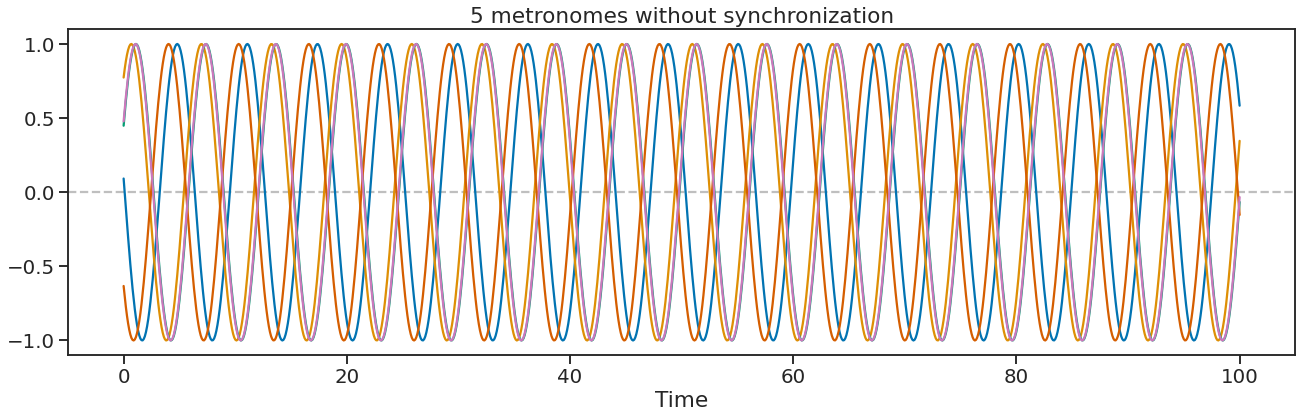

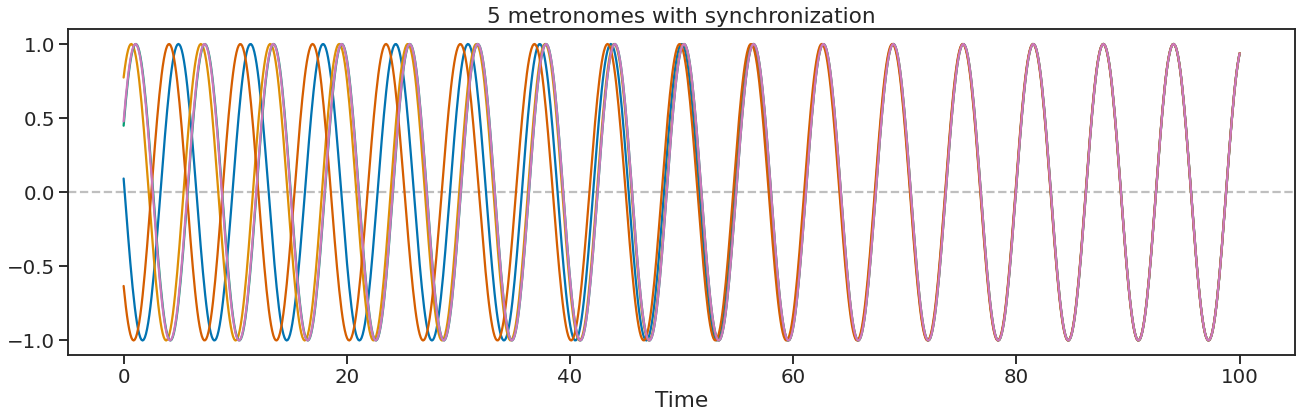

In [7]:
#| code-summary: 5 metronomes with random phase

Metronome.clear_metronomes()
Metronome.k = 0.008

m1 = Metronome(np.random.uniform(0, 2*np.pi))
m2 = Metronome(np.random.uniform(0, 2*np.pi))
m3 = Metronome(np.random.uniform(0, 2*np.pi))
m4 = Metronome(np.random.uniform(0, 2*np.pi))
m5 = Metronome(np.random.uniform(0, 2*np.pi))

plot_metronomes('5 metronomes without synchronization')

Metronome.calculate_synchronization()

plot_metronomes('5 metronomes with synchronization')

Πηγές:

- Bryan Daniels, _Synchronization of Globally Coupled Nonlinear Oscillators_, Ohio Wesleyan University, <http://go.owu.edu/~physics/StudentResearch/2005/BryanDaniels/index.html>
- Harvard Natural Sciences Lecture Demonstrations, _Synchronization of Metronomes_, Harvard University, <https://sciencedemonstrations.fas.harvard.edu/presentations/synchronization-metronomes>
- Jonatan Pena Ramirez, Henk Nijmeijer, _The secret of the synchronized pendulums_, physicsworld, <https://physicsworld.com/a/the-secret-of-the-synchronized-pendulums/>